---
title: Computer Vision for the Humanities: an introduction to deep learning for image classification
collection: lessons
layout: lesson
slug: LEAVE BLANK
date: LEAVE BLANK
translation_date: LEAVE BLANK
authors:
- Daniel van Strien 
- Kaspar Beelen
- Melvin Wevers
- Thomas Smits
- Katherine McDonough
reviewers:
- LEAVE BLANK
editors:
- LEAVE BLANK
translator:
- FORENAME SURNAME 1
- FORENAME SURNAME 2, etc
translation-editor:
- LEAVE BLANK
translation-reviewer:
- LEAVE BLANK
original: LEAVE BLANK
review-ticket: LEAVE BLANK
difficulty: LEAVE BLANK
activity: LEAVE BLANK
topics: LEAVE BLANK
abstract: LEAVE BLANK
---

{% include toc.html %}

## Introduction 

Although most historians would agree that (modern) representation is shaped by multimodal media – i.e. media, such as the newspaper, television or internet, that combine several modes – the fields of Digital Humanities and Digital History have been dominated by a wide variety of textual analysis[^romein]. Although modern historians have frequently been accused of neglecting non-textual forms of representation, the digital iteration of this phenomena has been attributed to the technical possibilities (and limitations) of OCR ([Optical Character Recognition](https://en.wikipedia.org/wiki/Optical_character_recognition)) technology, which renders digitized text machine-readable, and the available techniques, mostly stemming from the field of Natural Language, to analyze them[^sayers]. This combination has shaped the central methodological innovation of the field of digital history: the ability to ‘distant read’ large corpora and discover large-scale patterns.[^moretti] 

Over the last 10 years, the field of computer vision, which seeks to gain a high-level understanding of images using computational techniques, has seen rapid innovation. For example, computer vision models are able to locate and identify people, animals and thousands of objects on images with high levels of accuracy. This technological innovation promises the same innovation for images that the combination of OCR/NLP ([Natural language processing](https://en.wikipedia.org/wiki/Natural_language_processing)) techniques caused for texts. They open up a part of the digital archive for large-scale analysis, which, until now, has been left uncovered: the millions of images in digitized books, newspapers, periodicals, and historical documents. They allow historians to explore the ‘visual side of the digital turn in historical research’.[^wevers]

This series of lessons provide several examples of how computer vision techniques could be applied. However, the ability to train custom computer vision models provide historians with the opportunity to analyze large historical visual corpora in many different ways. Next to identifying things on images, or classifying them into different categories, which mostly focus on visual content, computer vision techniques could also be used to chart the stylistic (dis)similarities between them.  

While the application of computer vision techniques holds promise, it also presents historians with a set of theoretical and methodological challenges. First of all, in our opinion, any application of computer vision techniques to historical corpora should start from a carefully formulated historical question and, as a result, include a discussion of scale. In short: why is it important that we answer the question and why are computer vision techniques necessary to answer it? 

Second, following discussions in the field of ML fairness[^crawford][^Gebru], which seeks to address the question of bias in machine learning (ML), historians should be conscious of the fact that computer vision techniques sheds light on certain parts of visual corpora, but might overlook, or even obscure, other parts. As historians have long been aware that they look at the past from their own time, any application of computer vision techniques should include a discussion of possible ‘historical bias’. Because (most) computer vision models are trained on contemporary data, we run the risk of projecting the time-specific biases of this data on the historical record. Whilst it is beyond the scope of these lessons to explore this question of bias fully, it is something that should be kept in mind as you apply these methods to historical materials. 

### Lesson Aims

These lessons aim to:
- Provide an introduction to [deep learning](https://en.wikipedia.org/wiki/Deep_learning ) based computer vision methods for humanities research. 
- Give an overview of the steps involved in training a deep learning model.
- Discuss some of the specific considerations around using deep learning/computer vision for humanities research.
- Help you decide whether deep learning might be a useful tool for you.

These lesson don't aim to:
- Reproduce other more generic introductions to deep learning, though they do cover *some* of the same material 
- Cover every detail of deep learning and computer vision; though these lessons don't try to 'hide' anything, they also won't cover all topics in full detail. 

### Suggested Prior Skills

- Some familiarity with [Python](https://en.wikipedia.org/wiki/Python_(programming_language)) or another programming language will be helpful for following these lessons fully. If you are not familiar with Python it may be useful to follow the Programming Historian [lessons](https://programminghistorian.org/en/lessons/?topic=python) on Python before starting these lessons. Specifically it would be beneficial to understand how to use variables, indexing, and to have some familiarity with using methods from external libraries. 
- We assume basic familiarity with using [Jupyter Notebooks](https://jupyter.org/try) i.e. knowing how to run the code included in a Jupyter notebook. If you are unfamiliar with notebooks you may find the [introduction to Jupyter Notebooks](https://programminghistorian.org/en/lessons/jupyter-notebooks) Programming Historian lesson a helpful resource in conjunction with these lessons. 
- There is some use of external Python libraries in this tutorial but previous knowledge of these libraries isn't necessary. The steps involved in using these libraries will be explained as they are used. 

## Lesson Setup

Depending on your personal preferences, you may prefer to either skip this section and read the lesson first, or go through the setup process first and run the code as you read the lesson. 

In this series of lessons we will be using a deep learning based approach to computer vision. The process of setting up an environment for doing deep learning has become simpler but can still be complex. We have tried to keep this setup process as simple as possible, and provide recommendations for a fairly simple route to getting started with running the lesson code. 

### Notebooks
This series of programming historian lessons are available as Jupyter Notebooks. We recommend you run the lesson code in these notebooks. Jupyter Notebooks work well for the exploratory nature of the type of coding we will be using in these lessons. 

### Running the Notebooks
You can run the lesson notebooks in a variety of different ways. We strongly encourage you to use the 'cloud' setup instructions as opposed to setting things up locally. This is for a couple of reasons:

- The setup process for using deep learning in a cloud environment *can* be much simpler than trying to set things up locally. Many laptops and personal computers won't have this type of hardware available and the process of installing necessary software drivers can be time consuming. 
- The code in this lesson will run much more quickly when a specific type of [Graphical Processing Unit](https://en.wikipedia.org/wiki/Graphics_processing_unit) (GPU) is available. This will allow for an interactive approach to working with models and outputs.
- [GPUs are more energy efficient](https://doi.org/10.1109/BDCloud-SocialCom-SustainCom.2016.76) for some tasks compared to [Central Processing Unit ](https://en.wikipedia.org/wiki/Central_processing_unit) (CPUs), including the type of tasks we will work with in these lessons. 

### Kaggle
[Kaggle](https://www.kaggle.com/) is a website which hosts datasets, runs data science competitions and provides learning resources. Kaggle also hosts Jupyter Notebooks, including notebooks with access to GPUs.  

To run the lesson code on Kaggle you will need to:
1. Create an account on [Kaggle](https://www.kaggle.com), or log in to an existing account. 
2. Go to [www.kaggle.com/davanstrien/computer-vision-for-the-humanities-ph/notebooks](), this will take you to the notebooks for these lessons. The data used in these lessons are also included alongside these notebooks. 
3. To run this notebook you will need to click on the 'Edit' button. This will create a copy of the notebook that you can run and edit. 
4. Make sure that the 'Accelerator option' is selected as to 'GPU'; you will find this option under 'settings'. 
![](figs_deeplearning/kaggle_gpu.png)
5. The interface for Kaggle notebooks should be fairly familiar if you have used Jupyter notebooks before. To run a cell containing code you can click the ▶️ button or when the cell is selected using 'Shift + Enter' to run the cell. 
6. Remember to close your session down once you have finished working with the notebooks. You can do this under the 'run' drop down menu at the top of a Kaggle notebook. 
 
Kaggle has further [documentation on using their notebooks](https://www.kaggle.com/docs/notebooks) as well as guidance on [Efficient GPU Usage Tips](https://www.kaggle.com/docs/efficient-gpu-usage)

### Local Setup 
- If you don't want to use one of the cloud setup instructions you will find instructions for setting up this lesson locally \ # TODO add link to local setup instructions 

## Lesson Structure 

The structure of these lessons may follow a different order to what you may expect. Instead of starting from the 'ground up', this lesson starts from a practical applications of computer vision before drilling down into more detail of *parts* of the pipeline in the following lesson. This is done for a number of reasons:

- When starting with the fundamentals it can be hard to understand how the different pieces of a topic fit together, and which are most important to understand for practical applications.

- There is the danger of ['“learning about” something at the expense of actually learning it'](https://www.gse.harvard.edu/news/uk/09/01/education-bat-seven-principles-educators). Although there are theoretical components to these lessons, we want to get you started in *using* deep learning based methods.  

- You may want to use deep learning as a tool that supports your work but doesn't underpin research findings directly. Arguably this may justify a lower investment in knowing all the details of how a tool works. [^abstraction]

As there are already a plethora of (very good) generic deep learning tutorials, courses and books available, these lessons focus on the application of computer vision techniques in the field of the humanities. They especially aim to cover the most important things to be aware of and control when you are getting started.

If you need to learn more about some of the specific fundamentals there are a range of resources available; some suggestions are made in the resources section at the end of these lessons.

## A Quick Introduction to Machine Learning

Before moving to the first practical example, it might be useful to briefly review what is meant by 'machine learning'. [Machine learning](https://en.wikipedia.org/wiki/Machine_learning) aims to allow computers to 'learn' from data instead of being explicitly programmed to do something. For example, if we want to filter out [spam emails](https://en.wikipedia.org/wiki/Email_spam) there are a few different approaches we could take. One approach could be to read through examples of 'spam' and 'non-spam' emails to see if we can identify any [signals](https://en.wikipedia.org/wiki/Signal) which indicate that an email is spam. We might, for example, come up with a list of keywords which we think will be likely to indicate spam. Once we have done this we could write a program that does something like this for each email received:

```
count number spam_words in email:
    if number spam_words >= 10:
        email = spam
```

In contrast, a machine learning approach would instead train a machine learning [algorithm](https://en.wikipedia.org/wiki/Algorithm) on labeled examples of emails which are 'spam' or 'not spam'. This algorithm would over repeated exposure to examples 'learn' patterns which indicate whether an email is spam or not. This is an example of ['supervised learning'](https://en.wikipedia.org/wiki/Supervised_learning), in which an algorithm is exposed to labeled data.  This is the type of machine learning which this tutorial will focus on. There are different approaches to the managing this training process, some of which we will cover in these lessons.

There are advantages and disadvantages to using machine learning. Some advantages in our email example include avoiding having to manually identify what indicates if an email is spam or not. This is particularly useful when these signals might be subtle or hard to detect. If spam emails change in the future you don't need to rewrite your entire program but can instead train your model with new examples. Some disadvantages include the requirement for labeled examples which can be time consuming to create. One major limitation of some machine learning algorithms is that it can be difficult to understand how they made a decision i.e. why an email was labeled spam or not. The implications of this vary depending on how much 'power' the algorithm is given in a system, something which will be returned to later.

Deep learning is an approach to machine learning which is increasingly used for a broad range of tasks. We will cover deep learning in more detail later in this lesson, but for now we can think of 'deep learning' as a branch of 'machine learning'.

## Training an Image Classification Model 

Now we have got a very general overview of machine learning, we'll move to our first example of using deep learning for computer vision. In this example we will build an image classifier. This classifier will learn to assign images to one of two categories based on labeled training data. 

### The Data: Classifying Images from Historical Newspapers 

In these lessons, we will work with a dataset which is derived from the ["Newspaper Navigator" dataset](https://news-navigator.labs.loc.gov/). This is a dataset of extracted visual content for 16,358,041 digitised historic newspaper pages drawn from the [Library of Congress](https://loc.gov/) [Chronicling America collection](https://chroniclingamerica.loc.gov/about/) and places these images into one of seven categories, including photographs and advertisements.

The Newspaper Navigator data was created using an [object detection](https://en.wikipedia.org/wiki/Object_detection) deep learning model. This model was trained on annotations of World War 1-era Chronicling America pages, including annotations made by volunteers as part of the [Beyond Words](http://beyondwords.labs.loc.gov) crowdsourcing project.[^navigator] 

If you want to find out more information about how this dataset was created you may want to read the [journal article](https://arxiv.org/abs/2005.01583) describing this work or look at the [GitHub repository](https://github.com/LibraryOfCongress/newspaper-navigator) which contains the code and training data. We won't be replicating this model in this lesson. Instead, we will use the output of this model as the starting point for creating the data we use in this tutorial. Since the data from Newspaper Navigator is predicted by a machine learning model it will contain errors, for now, we will accept that the data we are working with is imperfect.

### Classifying Newspaper Advertisements 

For our first application of deep learning, we'll focus on classifying images predicted as adverts (remember this data is based on predictions and will contain some errors). More specifically, we'll work with a sample of images of adverts covering the years 1880-5.

#### Detecting if Advertisements Contains Illustrations 
If you look through the advert images, you will see that some of the adverts contain only text, whilst others have some kind of illustration in the advert.

An advert with an illustration:

<img src="figs_deeplearning/az_gecko_ver01_data_sn84020558_00202192166_1895040701_0061_000_6_98.jpg" width="400">

Source: Arizona republican. [volume] (Phoenix, Ariz.) 1890-1930, March 29, 1895, Page 7, Image 7
Image provided by Arizona State Library, Archives and Public Records; Phoenix, AZ
Persistent link: [https://chroniclingamerica.loc.gov/lccn/sn84020558/1895-03-29/ed-1/seq-7/]()


An advert without an illustration:

![](figs_deeplearning/in_ashbel_ver01_data_sn82015679_00295870370_1890020601_0346_001_6_98.jpg) 

Source: The Indianapolis journal. [volume] (Indianapolis [Ind.]) 1867-1904, February 06, 1890, Page 8, Image 8
Image provided by Indiana State Library
Persistent link: [https://chroniclingamerica.loc.gov/lccn/sn82015679/1890-02-06/ed-1/seq-8/]()


Our classifier will be trained to predict which category an advert image belongs to. We might use this classifier to help automate finding adverts with images for further 'manual' analysis. Alternatively, we may use this classifier more directly to help perform research by allowing us to quantify how many adverts contained illustrations for a given year, and if this changed over time, or based on other properties of the newspaper like the place of publication. The intended use of your model will impact the labels you choose to train your model on, and how you choose to assess whether a model is performing sufficiently well. We'll into dig into these issues further as we move through these lessons. 

### Creating our Classifier 

Now we we have defined the goal we want to try to tackle with deep learning, we'll move to developing the code for this task. There are a number of ways we could do this. The Python programming language provides all the functionality we would need to develop code to address this problem from scratch, however we'll almost always want to approach a computer vision problems by building on top of an existing [framework](https://en.wikipedia.org/wiki/Software_framework) or [software library](https://en.wikipedia.org/wiki/Library_(computing)). These libraries will allow you to tackle your problem with much less code compared to creating a solution from scratch and will also be much more efficient and likely to contain less bugs. 

Some libraries/frameworks for deep learning with Python interfaces include: [Keras](https://keras.io/), [Tensorflow](https://www.tensorflow.org/), [Pytorch](https://pytorch.org/), and [fastai](fast.ai). These libraries have slightly different features and aims but all of them implement some of the common building blocks of deep learning. There are advantages and disadvantages to all of these frameworks with some being more suited for particular tasks. 

#### An Introduction to the fastai Library 

In this series of lessons, we will work with [fastai](http://docs.fast.ai/). fastai is a Python library for deep learning "which provides practitioners with high-level components that can quickly and easily provide state-of-the-art results in standard deep learning domains, and provides researchers with low-level components that can be mixed and matched to build new approaches"[^howard]. The library is developed by [fast.ai](https://www.fast.ai/about/) (notice the dot!). fast.ai is a research organisation that aims to make deep learning more accessible. Alongside the fastai library, fast.ai also organises free courses and carries out research. 

There are a few reasons why fastai was chosen for this tutorial: 

- It is focused on making deep learning accessible, both in the API to the library but also in implementing techniques that limit the requirements for a large amount of data or computational resources.
- Many best practices are implemented as 'defaults', helping achieve good results.
- There are different levels at which you can interact with the library depending on how much you need to change lower-level details.
- The library sits on top of Pytorch which makes it relatively simple to use existing Pytorch code. 

Although this tutorial focuses on fastai, many of the techniques shown are applicable across other frameworks too. 

### Creating an Image Classifier in fastai
The next section will outline the steps involved in creating and training a classification model to predict whether an advert is text-only or also contains an illustration. Briefly, the steps will be:
1. Load the data.
2. Create a model.
3. Train this model.

These steps will be covered fairly quickly; don't worry if you feel you are not following everything in this section, the lesson will get back to what is happening in more detail later. 

The first thing we'll do is import the required modules from the fastai library. In this case, we import `vision.all` since we are working on a computer vision task.

In [ ]:
from fastai.vision.all import *

<div class="alert alert-warning">
 Using star imports is generally discouraged in Python. However, fastai uses <a href="https://docs.python.org/3.5/tutorial/modules.html#importing-from-a-package">__all__</a> to provide a list of packages that should be imported when using star import. This approach is useful for exploratory work but you may still want to change your imports to be more explicit. 
</div>

We will also import [Matplotlib](https://matplotlib.org/), a library for creating visualizations in Python. We will ask Matplotlib to use a different [style](https://matplotlib.org/3.2.1/gallery/style_sheets/style_sheets_reference.html) using the `style.use` method. 

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')

### Loading the Data

There are a number of ways in which data can be loaded using the fastai library. The advert data consists of a folder which contains the image files, and a CSV file which contains a column with paths to the images, and the associated label:

| file | label |
|----|----|
| kyu_joplin_ver01_data_sn84037890_00175045338_1900060601_0108_007_6_97.jpg | text-only |

There are various ways in which we could load this type of data using `fastai`. In this example we'll use `ImageDataLoaders.from_csv`. As the name suggests the `from_csv` method of `ImagDataLoaders` loads data from a CSV file. We need to tell fastai a few things about how to load the data to use this method:

- The path to the folder where images and CSV file are stored.
- The coloumns in the CSV file which contain the labels.
- One 'item transform' ```Resize()``` to resize all the images to a standard size.

We will go into  more detail later in the lesson. We'll create a variable `ad_data` which will be used to store the steps for loading this data:

In [ ]:
ad_data = ImageDataLoaders.from_csv(
    path="ads_data/",  # root path to csv file and image directory
    csv_fname="ads_upsampled.csv/",  # the name of our csv file
    folder="images/",  # the folder where our images are stored
    fn_col="file",  # the file column in our csv
    label_col="label",  # the label column in our csv
    item_tfms=Resize(224, ResizeMethod.Squish),  # resize imagesby squishing so they are 224x224 pixels
    seed=42,  # set a fixed seed to make results more reproducible
)

It is important to make sure that data has been loaded correctly. One way to check this quickly is to use `show_batch()` method on our data. This will display the images and the associated labels for a sample of our data.  

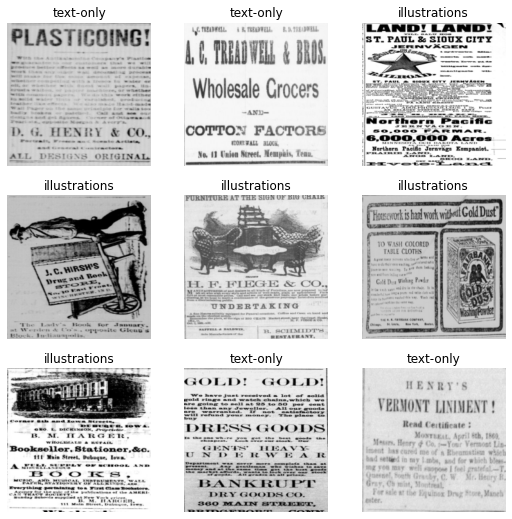

In [ ]:
ad_data.show_batch()

You can see here that the labels have been associated correctly with the labels we want to classify these images into, in this case ```text-only``` and ```illustration```. This is a useful way of checking that your labels and data have been loaded correctly. 

### Creating the Model

Now that fastai knows how to load the data, the next step is to create a model which will be trained on this data. To create a model suitable for computer vision we will use a function `cnn_learner`. This function will create a ['Convolutional  Neural Network'](https://en.wikipedia.org/wiki/Convolutional_neural_network), a type of deep learning model often used for computer vision applications. To use this function you need to pass (at a minimum):

- The data the model will use as training data.
- The type of model you want to use.

This is already sufficient for creating a computer vision model in fastai, but you will usually also want to pass some metrics you want to track during training. This will allow you to get a better sense of how well your model is performing on the task you are training it on. In this example, we'll use `accuracy` as the metric. 

Let's create this model and assign it to a new variable `learn`

In [ ]:
learn = cnn_learner(
    ad_data,  # the data the model will be trained on
    resnet18,  # the type of model we want to use
    metrics=accuracy,  # the metrics to track
)

### Training the Model 
Although we have created a `cnn_learner` model, we haven't actually trained the model yet. This is done using a `fit` method. Training is the process which allows the computer vision model to 'learn' how to predict the correct labels for the data. There are different ways we can now train (fit) this model. To start with, we'll use the `fine_tune` method. In this example the only thing we'll pass to the fine tune method is the number of epochs to train for.  Each pass through the entire dataset is an 'epoch'. The amount of time the model takes to train will depend on where you are running this code and the resources available. Again, we will cover the details of all of these components below.

In [ ]:
learn.fine_tune(5)

epoch,train_loss,valid_loss,accuracy,time
0,0.971876,0.344096,0.860000,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.429913,0.394812,0.840000,00:05
1,0.271772,0.436350,0.853333,00:05
2,0.170500,0.261906,0.913333,00:05
3,0.125547,0.093313,0.946667,00:05
4,0.107586,0.044885,0.980000,00:05


When you run this method you will see a progress bar showing how long the model has been training and the estimated remaining time, alongside a table which displays some other information about the model, this includes our tracked metric, accuracy. You can see that in this example we got an accuracy >90%. When you run the code yourself the score you get will be slightly different. 

### Results 
While deep learning techniques are commonly perceived as needing large amounts of data and extensive computing power, our example shows that for many applications smaller datasets suffice.  In this example, we could have potentially used other approaches; the aim here was not to show the best solution with this particular dataset but to give a sense of what is possible to do with a limited number of labeled examples. 

# Computer Vision using Deep Learning

Now that we have an overview of the process we'll go into more detail about how this process works.

## The Workflow of a Supervised Computer Vision Problem 
This section will start to dig into some of the steps involved in the process of creating a deep learning based computer vision model. This process involves a range of steps, only some of which are directly about training models. A high level illustration of a supervised machine learning pipeline might look like this: 

![](figs_deeplearning/deep-learning-pipeline-simple.png)

We can see that there are quite a few steps before and after the training the model part. Before we get to the stage of training a model we will need data. In this lesson, data has already been prepared but it is likely that there will usually not be a dataset that helps you tackle your problem exactly. As a result, you will often have to create this data yourself. The process of getting access to data will vary depending on the type of images you are interested in working with, and where those images are currently held. Some heritage collections are already making bulk collections of images data available, whilst others largely make images available only via a 'viewer'. The increasing adoption of the [IIIF standard](https://iiif.io/) is making the process of working with images held by different institutions simpler. 

Once you have a collection of images to work with, the next step if using supervised learning will be to create some labels for this data. Once you have either created or accessed a labelled dataset the next step is to train the model. This process will be discussed in much more detail below. Once a model has been trained you will get out some predictions. These predictions are 'scored' using a range of potential metrics, some of which we'll explore later on. 

Once a model has reached a satisfactory score, the outputs of the model may be used for a range of activities under the heading of 'interpretation'. Once we have predictions from a deep learning model there are different options for what to do with these. They could be used directly for making decisions for example automating where images are displayed in a web collection, but it often likely that the predictions will be fed back to a human for further analysis. This will particularly be the case if the intended use of the deep learning model is to explore some historical phenomena. 

## Training a Model

Zooming in on the deep learning part of the workflow, what does the training process look like? 

![](figs_deeplearning/training-loop.jpg)

A high-level summary of the training loop for supervised learning; start with some images and labels, do some preparation to make the input suitable for a deep learning model, pass the data through the model, make predictions for the labels, calculate how wrong the predictions are, update the model with the aim of generating better predictions next time. This process is repeated a number of times. During this training loop metrics are reported which let the human training the model evaluate how well the model is doing.

This is obviously a very high-level summary. Let's look at each step in the training loop, step-by-step. The next section will show these steps using code so don't worry too much if it doesn't all sink in during this section. 

### Input Data

Starting with the inputs to the model, we have images and labels. Although deep learning takes some inspiration from how human cognition works, the way a computer 'sees' is very different from a human. All deep learning models take numbers as inputs. Since images are stored on a computer as a matrix of pixel values, this process is relatively simple for computer vision models. Alongside these images we have a label(s) associated with each image.  Again, these are represented as numbers inside the model. 

#### How Much Data?
It is often believed that you need huge amounts of data to train a useful deep learning model, however, this is not always the case. We assume that if you are trying to use deep learning to solve a problem, you have enough data to justify not using a manual approach. The real problem is usually the amount of labelled data you have. It is not possible to give a definitive answer  to "how much data?", since the amount of training data required is dependent on a broad range of factors. There are a number of things which can be done to reduce the amount of training data required, some of which we will cover in this lesson. 

The best approach will likely be to create some initial training data and see how well your model does on this. This will help give you a sense of whether a problem is going to be possible to tackle. Furthermore, the process of annotating your data is valuable in itself.

#### Preparing Mini Batches
Usually, when we use deep learning it is not possible to pass all of your data into the model in one go. Instead, data is split into batches which contain a subset of the data. When using a GPU data is usually loaded into GPU memory one batch at a time. The size of this batch can have some impact on the training process but often the size of your batch is determined by the computational resources you have available, and the size of your images. 

The reason we use a GPU for training our model is that it will almost always be much quicker to train a model on a [GPU](https://en.wikipedia.org/wiki/Graphics_processing_unit) compared to a [CPU](https://en.wikipedia.org/wiki/Central_processing_unit). The reason for this is that a GPU is able to perform many calculations in parallel. As a result, GPUs can be much faster for doing computation which requires many parallel calculations, which includes training deep learning models. 

Before we can create a batch and load it onto the GPU we usually need to make sure the images are all the same size. This allows the GPU to run operations in parallel effectively. 
Once a batch has been prepared, we may want to do some additional transformations on our images to reduce the amount of training data required. We will cover some of these in more detail below.

### Creating a Model 

Once we have prepared data so it can be loaded one batch at a time, we pass it to our model. We already saw one example of a model in our first example `resnet18`. A deep learning model architecture defines how data and labels are passed through a model, In this lesson, we focus on a subset of deep learning model called ['Convolutional Neural Network'](https://en.wikipedia.org/wiki/Convolutional_neural_network) (CNN). 

<img src='figs_deeplearning/3-layer-network.png' width="800px"> 


This diagram gives a crude overview of the different components of a CNN model. In this type of model, an image is passed through several layers, before predicting an output label for the image ('text only' in this diagram). The layers of this model are updated during training so that they "learn" which features of an image predict a particular label. So for example, the CNN we trained on adverts will update the parameters known as "weights" for each layer, which then produces a representation of the image that is useful for predicting whether an advert has an illustration or not. 

[playground.tensorflow.org]() is a useful tool for helping to develop an intuition about how these layers capture different features of input data, and how these features, in turn, can be used to classify the input data in different ways. 

The power in CNNs and deep learning comes from the ability of these layers to encode very complicated patterns in data.[^universal] The challenge on a practical level is updating these weights effectively. 
 
#### Using an Existing Model? 

When considering how to create our model we have various options about what model to use. One option is to use an existing model which has already been trained on a particular task. You might for example use the [YOLO](https://pjreddie.com/darknet/yolo/) model. This models is trained to predict [bounding boxes](https://computersciencewiki.org/index.php/Bounding_boxes) for a number of different types of object on an image. Although this could be a valid starting point there are a number of limitations to this approach for working with historical material, or for humanities questions. Firstly, the data these models were trained on might be very different from the data you are using. This can impact the performance on this model on your data, and result in biases towards images in your data which are most similar to the training data used to train your model. Another issue is that if you use an existing model without any modification you are restricted to identifying the labels that the original model was trained on. 

Alternatively, you might start from scratch with a new model. Although it is possible to directly define a CNN model yourself by defining the layers you want your model architecture to include, this is usually not where you would start. It is often best to start with an existing model architecture. The development of new model architectures is an active area of research with models proving to be well suited for a range of tasks and data. These models are often then incorporated into deep learning frameworks.

Often, we want a balance between starting from scratch and leveraging existing models. In this lesson, we show an approach which uses existing model architectures but modifies the model slightly to allow it to predict new labels. This model is then trained on new example data so it becomes more suited to the task we want it to perform. This is a technique known as ['transfer learning'](https://en.wikipedia.org/wiki/Transfer_learning) which will be exploring further in this lesson. 

## Training 

Once a model has been created and data prepared, the training process can begin. Let's look at the steps of a training loop: 

1. A model is passed data and labels, one batch at a time. Each time an entire dataset has been passed through a model is known as an 'epoch'. The number of epochs used to train a model is one of the variables that you will need to control.

2. The model makes predictions for these labels based on the given inputs, using a set of internal weights. In this CNN model, the weights are contained within the layers of the CNN. 

3. The model calculates how wrong the predictions are, by comparing the predictions to the actual labels. A ['loss function'](https://en.wikipedia.org/wiki/Loss_function) is used to calculate how 'wrong' the model was in its predictions.

4. The model changes internal parameters to try to do better next time. The loss function from the previous step returns a 'loss value', often just referred to as the 'loss', which is used by the model to update the weights. 

A 'learning rate' is used to determine how much a model should update based on the calculated loss. This is another one of the important variables that can be manipulated during the training process. In a later lesson, we will see one potential way of trying to identify a suitable learning rate for your model. 

### Validation Data

When we train a deep learning model we usually do so to make predictions on new unseen data which doesn't contain labels. For example for our ad classifier, we might want to use this classifier across all of the advert images for a particular time period in order to count how many of each type of advert (illustrated or not) appeared in this corpus. We, therefore, don't want a model that only does well at learning how to classify the training data it is shown. This is why we almost always use some form of 'validation data'. This is data which is used to check that the weights a model is learning on the training data also translates to new data. In the training loop, the validation data is only used to 'test' the predictions of the model, it is not directly used by the model to update the weights. This helps to ensure we don't end up 'overfitting' our model. 'Overfitting' refers to when a model becomes very successful at making predictions on the training data but these predictions don't generalize beyond the training data. In effect, the model is 'remembering' the training data rather than learning more general features which will help make correct predictions on new data. A validation set helps prevent this by allowing you to see how well the model is doing on data it hasn't learned from. Sometimes an additional split is made of the data which is used to make predictions only at the end of training a model. This is often known as a 'test' set. A test set is often used to validate model performance for data science competitions, such as those hosted on [kaggle](https://www.kaggle.com/), and to validate the performance of models created by external partners. This helps ensure a model is robust in situations where validation data has deliberately or accidentally been used to 'game' the performance of a model. 

## Transfer Learning 

In our first ad classifier we used the `fine_tune()` method on our `learner` to train our model. What was this doing? You will have seen that the progress bar output showed two parts. The first epoch was training only the final layers of the model, after this the lower layers of the model were also trained. This is one way in which we can do [transfer learning](https://en.wikipedia.org/wiki/Transfer_learning) in fastai. The importance of transfer learning has already been briefly discussed in the previous sections. As a reminder, transfer learning uses the 'weights' that a model has previously learned on another task on a new task. In the case of image classification this usually means a model has previously been trained on a much larger dataset. Often this previous training dataset is ["ImageNet"](http://image-net.org/). 

ImageNet is a large database of images which is heavily used in Computer Vision research. ImageNet currently contains ["14,197,122" images](http://image-net.org/), for over 20,000 different labels. This dataset is often used as a [benchmark](https://dawn.cs.stanford.edu/benchmark/ImageNet/train.html) for computer vision researchers to compare their approaches. Ethical issues related to the labels and production of ImageNet are explored in *[The Politics of Images in Machine Learning Training Sets](https://www.excavating.ai/.)* by Crawford and Paglen.[^crawford] 

### A Non-Scientific Experiment Assessing Transfer Learning 

The use of deep learning in the context of working with heritage data has not been extensively researched. It is therefore useful to do small 'experiments' to try to validate whether various technique helps. This is also very useful for learning more about how deep learning works. As an example of this, let's see if transfer learning was actually helpful for training to classify whether 19th century newspaper adverts contained images or not. To do this we'll create a new `learner` with the same parameters as before but with the `pretrained` flag set to `False`, this flag tells fastai not to use transfer learning. We'll store this in a variable `learn_random_start`.

In [ ]:
learn_random_start = cnn_learner(ad_data, resnet18, metrics=accuracy, pretrained=False)

Now we have created a new learner we'll use the same `fine_fune` method as before and train for the same number of `epochs` as we used last time around.

In [ ]:
learn_random_start.fine_tune(5)

epoch,train_loss,valid_loss,accuracy,time
0,1.303890,0.879514,0.460000,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.845569,0.776279,0.526667,00:05
1,0.608474,0.792034,0.560000,00:05
2,0.418646,0.319108,0.853333,00:05
3,0.317584,0.233518,0.893333,00:05
4,0.250490,0.202580,0.906667,00:05


This best score we get when we randomly initialise the weights for the model is ~90% accuracy. In comparison, if we go back to our original model, which is stored in a variable `learn`, and use the ```validate()``` method,  we get the metrics (in this case accuracy) calculated on the validation set:

In [ ]:
learn.validate()

(#2) [0.04488467052578926,0.9800000190734863]

We can see that there is a fairly big difference between the two models' performance. We kept everything the same except changing the `pretrained`flag to ```False```. This flag determines if the model starts from the weights learned from training on ImageNet, or if the model instead starts from 'random' weights.[^kaiming] This was of course not a full proof that transfer learning works, but it does suggest that in this example it is probably a sensible default for us to use. 

### Why Does Transfer Learning Often Help?

As we have seen, transfer learning works by using a model trained on one task, on a new task. In our example we used a model trained on ImageNet to classify images of digitized 19th Newspapers. It might seem strange that transfer learning works in this case since the images we are training our model on are very different from the images in ImageNet. Although ImageNet does have a [category for newspapers](http://www.image-net.org/synset?wnid=n06267145#), these largely consist of images of newspapers in everyday settings rather than images cropped from newspapers. So why is using a model trained on ImageNet still useful for a task which has different labels and images to those in ImageNet?

When we looked at the diagram of a CNN model we saw that it is made of different layers, also known as feature maps. These layers create representations of the input image which pick up on particular features of an image which are useful for predicting a label. What are these features? Various techniques have been developed to help visualize the different layers of a neural network. These techniques have found that the earlier layers in a neural network tend to learn more 'basic' features, for example they learn to detect basic shapes like circles, or lines, whilst layers further into the network contain filters which encode more complex visual features, for example eyes. Since many of these features capture visual properties which will be helpful for many tasks, starting with a model that is already capable of detecting features in images will help the model detect features which are important for the new task, since these new features are likely to be a variant on the features the model already knows rather than completely new features. 

When a model is created in fastai using the `cnn_learner` method, an existing model architecture is used as the "body" of the model and a few additional layers are added to the end of the model the "head". The body part of the model, by default uses the weights learned through training on ImageNet. The "head" part of the model adds a few additional layers, which take the output of the body as input before moving to a final layer which is created to fit the training data you pass to `cnn_learner`. The `fine_tune` method first trains only the head part of the model i.e. the final few layers of the model, before 'unfreezing' the lower layers. When these layers are 'unfrozen' the weights of the model are updated through the process discussed above under 'training'. We can also take more active control of how much we train different layers of the model, something we will see as we move through a full pipeline of training a deep learning model. 

## Suggested Experiments

It is important to develop a sense of what happens when you make changes to the training process. We suggest making a copy of the lesson notebook, and seeing what happens if you make changes to some of the parts of the code. Some suggested things to try:

- Change the size of the input images defined in the `Resize` item transform in the `ImageDataLoaders`.
- Change the model used in `cnn_learner` from `resnet18` to `resnet34`. 
- Change the 'metrics' defined in `cnn_learner`. Some metrics included in fastai can be found in the [documentation](https://docs.fast.ai/metrics).
- Change the number of 'epochs' used in the `fine_tune` method. 

If something 'breaks' don't worry, you can return to the original notebook to get back to a working version of the code. In the next part of the lesson, the components of a deep learning pipeline will be covered in more detail. Investigating what happens when you make changes will be an important part of learning how to manage the process of training a computer vision model. 

# Part One Conclusion

In this lesson we:
- Gave a high-level overview of the distinction between rule-based and machine learning-based approaches to tackling a problem. 
- Showed a basic example of how to use fastai to create an image classifier with relatively little time and training data.
- Presented an overview of the steps of a deep learning pipeline and suggested some points in this pipeline where humanities scholars should pay particular attention.
- Ran a crude experiment to try and verify if transfer learning is useful for our computer vision classifier 

In the next part of this lesson, we will build on these points and dive into more detail at different stages of a deep learning pipeline. 

# Endnotes

[^romein]: Romein, C. Annemieke, Max Kemman, Julie M. Birkholz, James Baker, Michel De Gruijter, Albert Meroño‐Peñuela, Thorsten Ries, Ruben Ros, and Stefania Scagliola. ‘State of the Field: Digital History’. History 105, no. 365 (2020): 291–312. [https://doi.org/10.1111/1468-229X.12969.]()

[^sayers]: Sayers, Jentery, ed. The Routledge Companion to Media Studies and Digital Humanities. New York: Routledge, 2018.

[^moretti]: Moretti, Franco. Distant Reading. Illustrated Edition. London ; New York: Verso Books, 2013.

[^wevers]: Wevers, Melvin, and Thomas Smits. ‘The Visual Digital Turn: Using Neural Networks to Study Historical Images’. Digital Scholarship in the Humanities 35, no. 1 (1 April 2020): 194–207. [https://doi.org/10.1093/llc/fqy085.]()

[^crawford]: Crawford, K., Paglen, T., 2019. Excavating AI: The Politics of Training Sets for Machine Learning. [WWW Document]. -. URL [https://www.excavating.ai]() (accessed 2.17.20).

[^Gebru]: Jo, Eun Seo, and Timnit Gebru. ‘Lessons from Archives: Strategies for Collecting Sociocultural Data in Machine Learning’. In Proceedings of the 2020 Conference on Fairness, Accountability, and Transparency, 306–316. FAT* ’20. New York, NY, USA: Association for Computing Machinery, 2020. [https://doi.org/10.1145/3351095.3372829.]()

[^abstraction]: This is a claim that could be challenged, but there is almost always a level of abstraction at which we choose to 'stop' trying to understand all the details. For example, as a user of the Python programming language we may not dig into how Python itself is implemented in the C programming language. Likewise, a C programmer may not dig into all of the details of their C compiler. If we use deep learning as a 'tool' we want to be sure of how 'correct' our results are, not necessarily exactly *why* they are correct.

[^howard]: Howard, Jeremy, and Sylvain Gugger. ‘Fastai: A Layered API for Deep Learning’. Information 11, no. 2 (16 February 2020): 108. [https://doi.org/10.3390/info11020108.]()


[^navigator]: These annotations include a 'bounding box' around images, along with information about the type of image is contained within that bounding box. This object detection model was trained on this data and subsequently used to make predictions across the whole Chronicling America collection. The model extracts images from the page and classifies them into *one* of seven categories. Lee, Benjamin Charles Germain, Jaime Mears, Eileen Jakeway, Meghan Ferriter, Chris Adams, Nathan Yarasavage, Deborah Thomas, Kate Zwaard, and Daniel S. Weld. ‘The Newspaper Navigator Dataset: Extracting And Analyzing Visual Content from 16 Million Historic Newspaper Pages in Chronicling America’. ArXiv:2005.01583 [Cs], 4 May 2020. http://arxiv.org/abs/2005.01583.


[^universal]: Neural Networks are able to theoretically approximate any function. The mathematical proof of this exists in a number of forms under the heading of the "Universal Approximation theorem"](https://en.wikipedia.org/wiki/Universal_approximation_theorem). These proofs are not things you will need to know to practically use deep learning. However, if you are interested, a good overview of the idea can be found in a [youtube video](https://youtu.be/Ijqkc7OLenI)  

[^kaiming]: This initialisation isn't actually random in the fastai framework, and instead uses [Kaiming initialization](https://pouannes.github.io/blog/initialization/). <!---$std = \sqrt{\frac{2}{\left(1 + a^{2}  \right ) \times \text{input_dimensions}}}$-->

